# Coding Exercises (Part 4)

## Time Series Data

### Exercise 17: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [39]:
us_stocks = pd.read_csv('us_stocks.csv', parse_dates = [0], index_col = [0], header = [0, 1])

In [47]:
stocks = us_stocks.loc['31-12-2015':'31-12-2018', 'Adj Close']

In [48]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     754 non-null    float64
 1   FB      754 non-null    float64
 2   INTC    754 non-null    float64
 3   MCD     754 non-null    float64
 4   PG      754 non-null    float64
 5   WMT     754 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


In [49]:
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


In [50]:
stocks.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,90.957733,124.949997,44.557564,174.149994,90.256142,87.129997
2018-12-24,89.135193,124.059998,43.315437,170.279999,86.674469,85.820000
2018-12-26,93.457497,134.179993,45.899059,174.029999,89.383041,90.410004
2018-12-27,94.294075,134.520004,46.067993,175.710007,91.297897,91.589996
2018-12-28,94.035133,133.199997,46.455536,175.559998,90.464493,92.129997


__Visualize__ the Adjusted Close of the six stocks __over time__!

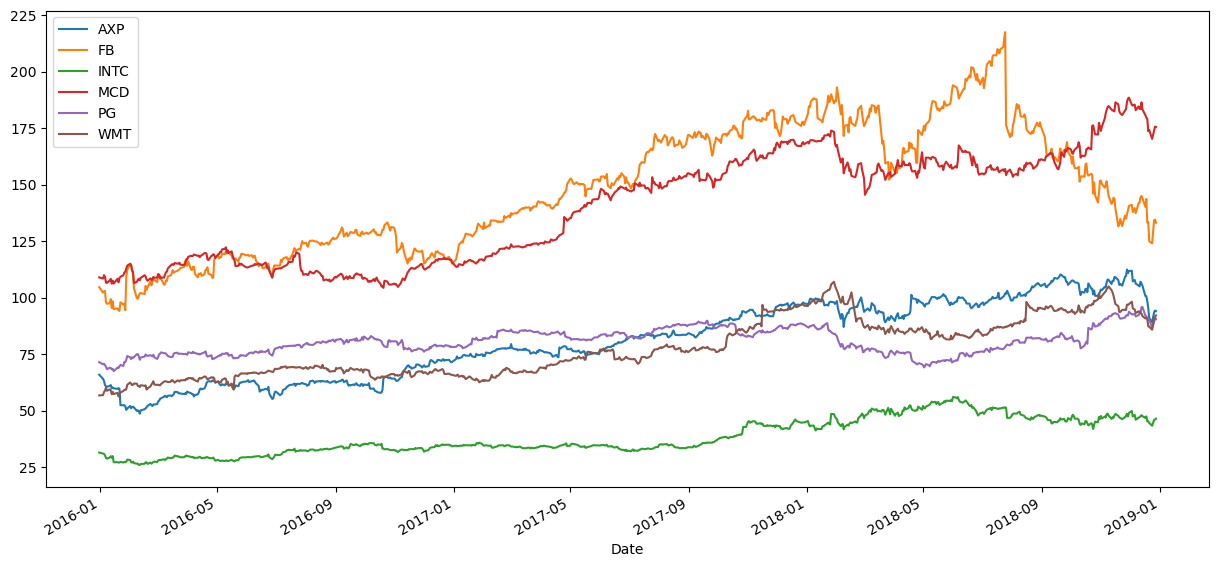

In [52]:
stocks.plot(figsize = (15, 7))
plt.show()

__Visualize__ the Adjusted Close of the six stocks __over time__, starting each at the __Base Value 100__!

In [56]:
stocks_norm = stocks.div(stocks.iloc[0]).mul(100)

In [57]:
stocks_norm

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-01-04,97.181859,97.668639,98.664755,99.526001,98.690331,100.261012
2016-01-05,95.686586,98.155933,98.200317,100.897243,99.005167,102.642742
2016-01-06,93.029395,98.385245,96.023252,100.220084,98.048091,103.670463
2016-01-07,92.191810,93.560094,92.423820,97.900822,97.191791,106.084838
...,...,...,...,...,...,...
2018-12-21,138.002317,119.386578,141.733365,159.816623,126.319454,153.606893
2018-12-24,135.237135,118.536206,137.782277,156.265147,121.306666,151.297418
2018-12-26,141.794993,128.205607,146.000532,159.706504,125.097492,159.389421


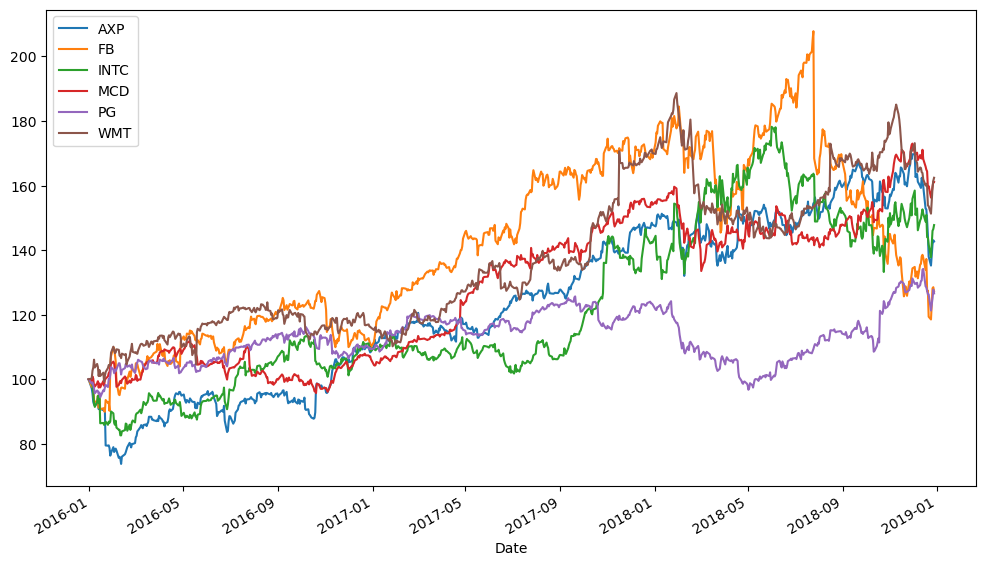

In [58]:
stocks_norm.plot(figsize = (12, 7))
plt.show()

Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [62]:
stocks_month = stocks.resample(rule = 'BME').last()

In [63]:
stocks_month.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-29,50.922123,112.209999,28.307537,114.170799,74.142738,61.404896
2016-02-29,52.901901,106.919998,27.240244,108.911270,72.872086,61.386375
2016-03-31,58.441471,114.099998,29.781067,116.801506,74.705444,63.844990
2016-04-29,62.578789,117.580002,27.875446,117.554268,73.313026,62.334877


In [64]:
stocks.loc['2015-12-31', 'FB']

104.660004

Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

#### **Using dayly data**

In [85]:
stocks_return1 = stocks.pct_change().dropna().mul(100)

In [86]:
summary1 = stocks_return1.describe().T.loc[:, ['mean', 'std']]

In [87]:
summary1

,mean,std
AXP,0.056290,1.344197
FB,0.049070,1.834639
INTC,0.064775,1.606492
MCD,0.068843,1.049461
PG,0.035900,0.957666
WMT,0.072817,1.300403


In [91]:
summary1['mean'] = summary1['mean'].mul(252)

In [93]:
summary1['std'] = summary1['std'].mul(np.sqrt(252))

In [94]:
summary1

,mean,std
AXP,14.185042,21.338462
FB,12.365649,29.123990
INTC,16.323202,25.502272
MCD,17.348488,16.659683
PG,9.046814,15.202469
WMT,18.349829,20.643250


#### **Using monthly data**

In [95]:
stocks_return2 = stocks_month.pct_change().dropna().mul(100)

In [99]:
summary2 = stocks_return2.describe().T.loc[:, ['mean', 'std']]

In [100]:
summary2

,mean,std
AXP,1.216187,6.545649
FB,0.865567,6.318259
INTC,1.255936,5.896327
MCD,1.417869,4.181708
PG,0.735810,3.994520
WMT,1.499687,5.405365


In [101]:
summary2['mean'] = summary2['mean'].mul(12)

In [102]:
summary2['std'] = summary2['std'].mul(np.sqrt(12))

In [103]:
summary2

,mean,std
AXP,14.594240,22.674792
FB,10.386801,21.887091
INTC,15.071230,20.425477
MCD,17.014426,14.485862
PG,8.829716,13.837425
WMT,17.996243,18.724733


__Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

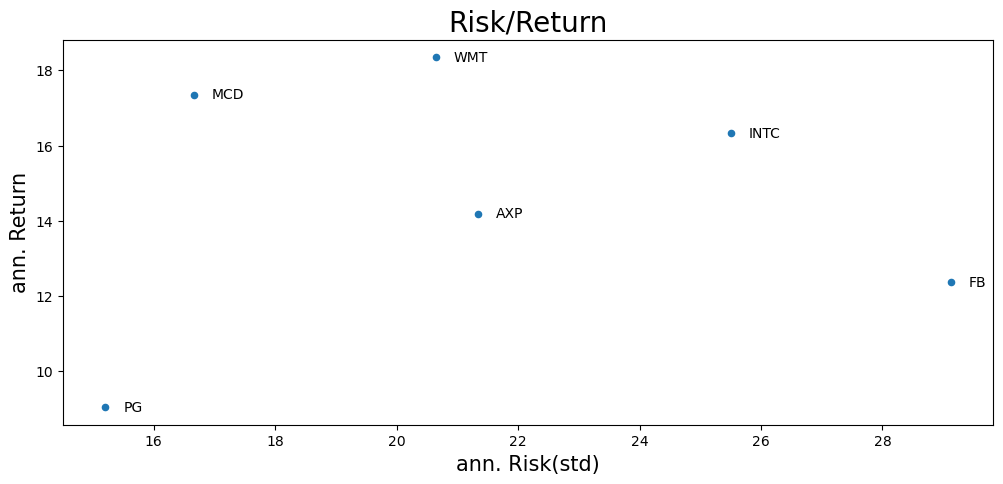

In [112]:
summary1.plot(kind = 'scatter', x = 'std', y = 'mean', figsize = (12, 5))
for idx in summary1.index:
    plt.annotate(text = idx, xy = (summary1.loc[idx, 'std'] + 0.3, summary1.loc[idx, 'mean'] - 0.1))
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Reindex__ the DataFrame __stocks__ with all __365 calander days of 2018__. Fill NaN Values!

In [141]:
all_2018 = pd.date_range(start = '2018-01-01', end = '2018-12-31')

In [142]:
all_2018

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [150]:
stocks_2018 = stocks.loc['2018']

In [151]:
stocks_2018 = stocks_2018.reindex(all_2018)

In [152]:
Day = stocks_2018.index.day_name()

In [153]:
Day

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', length=365)

In [154]:
stocks_2018.insert(loc = 0, column = 'Day', value = Day)

In [155]:
stocks_2018.reindex()

,Day,AXP,FB,INTC,MCD,PG,WMT
2018-01-01,Monday,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,Tuesday,97.122566,181.419998,45.412144,168.941528,86.876450,96.304199
2018-01-03,Wednesday,97.721367,184.669998,43.870941,168.229553,86.771019,97.144257
2018-01-04,Thursday,99.346771,184.330002,43.066414,169.409668,87.384384,97.232178
2018-01-05,Friday,99.573341,186.850006,43.366901,169.751038,87.441887,97.808487
...,...,...,...,...,...,...,...
2018-12-27,Thursday,94.294075,134.520004,46.067993,175.710007,91.297897,91.589996
2018-12-28,Friday,94.035133,133.199997,46.455536,175.559998,90.464493,92.129997
2018-12-29,Saturday,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30,Sunday,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
stocks_2018.head(20)

,Day,AXP,FB,INTC,MCD,PG,WMT
2018-01-01,Monday,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,Tuesday,97.122566,181.419998,45.412144,168.941528,86.876450,96.304199
2018-01-03,Wednesday,97.721367,184.669998,43.870941,168.229553,86.771019,97.144257
2018-01-04,Thursday,99.346771,184.330002,43.066414,169.409668,87.384384,97.232178
2018-01-05,Friday,99.573341,186.850006,43.366901,169.751038,87.441887,97.808487
2018-01-06,Saturday,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,Sunday,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,Monday,98.657196,188.279999,43.366901,169.633987,87.901909,99.254173
2018-01-09,Tuesday,99.021690,187.869995,42.281269,169.253616,87.259796,98.062462
2018-01-10,Wednesday,99.711250,187.839996,41.195652,169.224365,86.703941,97.359154


In [157]:
stocks_2018.ffill(inplace = True)

In [158]:
stocks_2018.head(20)

,Day,AXP,FB,INTC,MCD,PG,WMT
2018-01-01,Monday,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,Tuesday,97.122566,181.419998,45.412144,168.941528,86.876450,96.304199
2018-01-03,Wednesday,97.721367,184.669998,43.870941,168.229553,86.771019,97.144257
2018-01-04,Thursday,99.346771,184.330002,43.066414,169.409668,87.384384,97.232178
2018-01-05,Friday,99.573341,186.850006,43.366901,169.751038,87.441887,97.808487
2018-01-06,Saturday,99.573341,186.850006,43.366901,169.751038,87.441887,97.808487
2018-01-07,Sunday,99.573341,186.850006,43.366901,169.751038,87.441887,97.808487
2018-01-08,Monday,98.657196,188.279999,43.366901,169.633987,87.901909,99.254173
2018-01-09,Tuesday,99.021690,187.869995,42.281269,169.253616,87.259796,98.062462
2018-01-10,Wednesday,99.711250,187.839996,41.195652,169.224365,86.703941,97.359154


__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

154. __Import__ daily stock price data (__us_stocks.csv__) and __insepct__! Handle the __MultiIndex__! __Fill in the gaps__!

In [ ]:
stocks = pd.read_csv(---, header = [---, ---], index_col= [---], parse_dates= [---])

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

155. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are now in the DataFrame?

In [ ]:
# run the cell!
stocks.head()

In [ ]:
# run the cell!
stocks.info()

We have ... 754 Days.

156. __Plot__ stocks (figsize (12, 8)!

157. __Bring__ the six stocks to the __same Base__ (100) and __plot__ again! __Fill in the gaps!__

In [ ]:
stocks.---(stocks.iloc[0]).---(figsize = (12, 8))
plt.show()

Still hard to compare performance, right?

158. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month)! __Save__ resampled Dataframe in the variable __stocks_m__!

In [ ]:
# run the cell!
stocks_m.head()

159. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [ ]:
#run the cell!
ret

160. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [ ]:
summary = ret.---.T.iloc[:, [1,2]]

In [ ]:
#run the cell!
summary

161. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [ ]:
summary["mean"] = summary["mean"] * ---
summary["std"] = summary["std"] * ---

In [ ]:
#run the cell!
summary

162. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

In [ ]:
summary.plot(kind = ---, x = ---, y = ---, figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance and facebook the worst performance!

Next, let´s return a DataFrame with stock price information for __all 365 days__ in the year __2018__.

163. First, create a __new DatetimeIndex__ (year_2018) with __all 365 days__/timestamps in the year __2018__!

In [ ]:
# run the cell!
year_2018

In [ ]:
# run the cell!
stocks.head()

164. Second, __reindex__ the stocks DataFrame accordingly! Use the most appropriate __method__ to __fill NaNs__!

# Well Done!

-------------------

# Hints (Spoiler!)

154. The first two rows (index pos. 0 & 1) form the Columns MultiIndex. The Column with Datetime information is at index pos. 0.

155. stocks = stocks.loc["31-12-2015":"31-12-2018", "Adj Close"]

156. plot() method


157. div() method, plot() method

158. resample() method, last() method, use "BM" (month end business day)

159. pct_change() method, dropna() method

160. describe() method

161. *12 and *np.sqrt(12)

162. scatterplot, std and mean

163. pd.date_range() method

164. reindex() method, ffill